In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
%pylab inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')

# Importando base de dados
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Criando novas variáveis a partir das colunas Name e Cabin
train['Cabine_Nula'] = train['Cabin'].isnull().astype(int)
test['Cabine_Nula'] = test['Cabin'].isnull().astype(int)

train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
train['Title'] = [n if n in ['Mr', 'Miss', 'Mrs', 'Master', 'Col', 'Major'] else 'Outros' for n in train['Title']]
test['Title'] = test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test['Title'] = [n if n in ['Mr', 'Miss', 'Mrs', 'Master', 'Col', 'Major'] else 'Outros' for n in test['Title']]

# Limpando o texto da coluna Ticket para colocar no modelo
str_drop = ['A/5 ', 'A.5. ','A/4 ','A/S ','A4. ','C ','C.A. ','C.A./SOTON ','CA','CA. ','F.C. ','F.C.C. ','Fa ','LINE','P/PP ','PC ','PP ','S.C./A.4. ','S.C./PARIS ','S.O./P.P. ',
'S.O.C. ','S.O.P. ','S.P. ','S.W./PP ','SC ','SC/AH ','SC/AH Basle ','SC/Paris ','SC/PARIS ','SCO/W ','SO/C ','SOTON/O.Q. ','SOTON/O2 ', 'STON/O2. ','SOTON/OQ ','SW/PP ',
'STON/O 2. ','W./C. ','W.E.P. ','W/C ','WE/P ', 'P', 'A/5. ', 'A./5. ', 'A/4. ', '',' ', '  ', '   ', 'SO/', '. ', '.', 'Basle', 'W/', 'SW/', 'S', 'SW/', 'C/A', 'TON/OQ',
'C/A', 'AQ/', 'A', 'L', 'AQ/']

for value in str_drop:
  train['Ticket'] = train['Ticket'].str.replace(value, '')
  test['Ticket'] = test['Ticket'].str.replace(value, '')

train['Ticket'] = train['Ticket'].apply(lambda x: x.strip()).replace('', np.nan)
train['Ticket'].fillna(-1, inplace=True)
train['Ticket'] = train['Ticket'].astype(int)
test['Ticket'] = test['Ticket'].apply(lambda x: x.strip()).replace('', np.nan)
test['Ticket'].fillna(-1, inplace=True)
test['Ticket'] = test['Ticket'].astype(int)


# Função para limpar, preencher ou excluir colunas
def clean_data(data):
  data = data.drop(['Ticket', 'Name', 'Cabin'], axis=1)
  cols = ['SibSp', 'Parch', 'Fare', 'Age']
  for col in cols:
    data[col].fillna(data[col].median(), inplace=True)
  data.Embarked.fillna('U', inplace=True)
  return data

train = clean_data(train)
test = clean_data(test)

# Transformando valores texto em numéricos
le = preprocessing.LabelEncoder()
cols = ['Sex', 'Embarked', 'Title']
for col in cols:
  train[col] = le.fit_transform(train[col])
  test[col] = le.transform(test[col])
  # print(le.classes_)


Populating the interactive namespace from numpy and matplotlib


In [40]:
# Divisão dos dados em treino e validação para aplicação no modelo de ML
y = train['Survived']
X = train.drop('Survived', axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Aplicação no modelo 1
model_logistic_reg = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
predict_logistic_reg = model_logistic_reg.predict(X_val)
accuracy_score(y_val, predict_logistic_reg)


0.8156424581005587

In [42]:
# Aplicação no modelo 2
model_random_forest_class = RandomForestClassifier(n_estimators=1000 , n_jobs=-1, random_state=0).fit(X_train,  y_train)
predict_random_forest_class = model_random_forest_class.predict(X_val)
accuracy_score(y_val, predict_random_forest_class)


0.8547486033519553

In [27]:
# Geração de vários testes para identificar variação da acurácia
result_logistic_reg = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
  X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
  y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

  model_result1 = LogisticRegression(random_state=16).fit(X_treino, y_treino)
  predict_result1 = model_result1.predict(X_valid)
  result_logistic_reg.append(accuracy_score(y_valid, predict_result1))


In [28]:
# Geração de vários testes para identificar variação da acurácia
result_random_forest_class = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
  X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
  y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
  model_result2 = RandomForestClassifier(n_estimators=100 , n_jobs=-1, random_state=16).fit(X_treino, y_treino)
  predict_result2 = model_result2.predict(X_valid)
  result_random_forest_class.append(accuracy_score(y_valid, predict_result2))


((array([1., 1., 0., 5., 3., 0., 4., 2., 2., 2.]),
  array([0.7735426 , 0.77978385, 0.78602509, 0.79226634, 0.79850758,
         0.80474883, 0.81099007, 0.81723132, 0.82347257, 0.82971381,
         0.83595506]),
  <BarContainer object of 10 artists>),
 (array([2., 1., 1., 2., 7., 3., 0., 2., 1., 1.]),
  array([0.77078652, 0.77532221, 0.77985791, 0.78439361, 0.78892931,
         0.79346501, 0.79800071, 0.8025364 , 0.8070721 , 0.8116078 ,
         0.8161435 ]),
  <BarContainer object of 10 artists>))

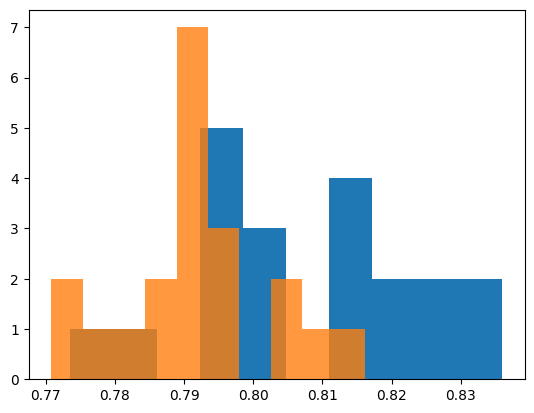

In [37]:
pylab.hist(result_random_forest_class), pylab.hist(result_logistic_reg, alpha=0.8) # Azul é o RandonForest

<Axes: >

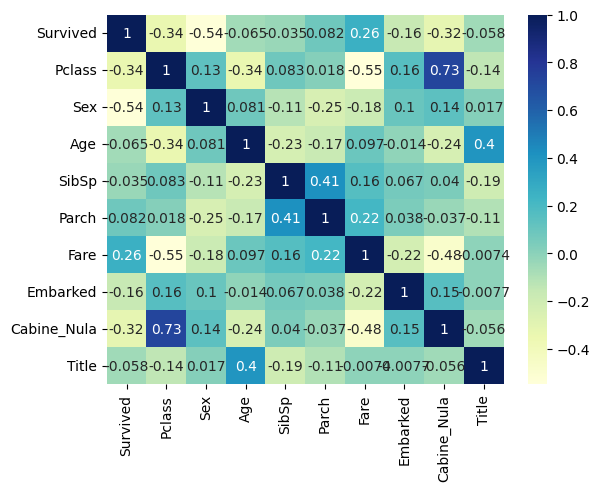

In [30]:
sns.heatmap(train.corr(), annot=True, cmap='YlGnBu')

In [43]:
# Criar arquivo para submissão no Kaggle
sub_predict1 = model_logistic_reg.predict(test)
sub_predict2 = model_random_forest_class.predict(test)
# df = pd.DataFrame({'PassengerId': test_ids.values,
#                    'Survived': sub_predict2,
#                    })

# df.to_csv('Titanic_V007.csv', header=True, index=False)
# !head -n10 Titanic_V007.csv


test['Survived'] = sub_predict2
test[['PassengerId', 'Survived']].to_csv('Titanic_V007.csv', index=False)
!head -n10 Titanic_V007.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,0
897,0
898,1
899,0
900,1


In [ ]:

# display(v_train)
# display(v_train[train['Survived'] == 1])
# display(train[train['Embarked'].isnull()])
# display(train[train['Name'].str.contains('Col')])